In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import holoviews as hv
from geoviews import tile_sources as gvts
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [112]:
food_loss_data = "Resources\FAO_Food_Loss.csv"
by_country = "Resources\Food_Loss_By_Country.csv"

In [113]:
food_loss_df = pd.read_csv(food_loss_data)
by_country_df = pd.read_csv(by_country)
food_loss_df = pd.DataFrame(food_loss_df)
food_loss_df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,...,notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# filter out the empty columns
food_loss_clean = food_loss_df[["m49_code", "country", "region", "commodity", "year", "loss_percentage", "loss_percentage_original", "loss_quantity", "activity1", "activity2", "food_supply_stage", "treatment", "cause_of_loss"]]
food_loss_clean.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents


In [115]:
# Check number of rows per country
count_per_country = food_loss_clean.groupby("country")
count_per_country.count()

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
Africa,1,0,1,1,1,1,0,0,0,1,0,0
Algeria,2,0,2,2,2,2,0,0,0,2,0,0
Angola,726,0,726,726,726,726,0,726,220,616,0,0
Argentina,14,0,14,14,14,14,13,13,0,14,13,0
Armenia,38,0,38,38,38,38,0,20,8,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,16,0,16,16,16,16,8,11,3,15,11,0
Western Africa,4,0,4,4,4,4,0,4,0,4,0,0
Western Asia,5,0,5,5,5,5,0,5,2,5,0,0


In [116]:
# figure out which countries have some much 
count_per_country_sorted = count_per_country.count().sort_values(by="m49_code", ascending=False)
count_per_country_sorted.head(20)

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
United States of America,3094,0,3094,3094,3094,3094,13,191,96,3094,90,6
India,1354,140,1354,1354,1354,1354,111,1062,133,1351,46,136
Ethiopia,1064,27,1064,1064,1064,1064,8,1002,290,933,83,28
Kenya,1054,77,1054,1054,1054,1054,11,998,269,917,146,108
Uganda,866,31,866,866,866,866,7,851,279,734,8,18
Ghana,817,99,817,817,817,817,6,724,332,729,100,103
Malawi,803,14,803,803,803,803,9,747,223,693,29,18
Senegal,799,23,799,799,799,799,1,748,220,689,0,40
Zambia,772,5,772,772,772,772,1,762,220,684,4,8


In [117]:
countries_list = ["Ethiopia", "Kenya", "Uganda", "Malawi", "Senegal", "Zambia", "Burkina Faso", "Angola", "Benin", "Mali", "United Republic of Tanzania", "Mozambique", "Rwanda", "Nigeria"]
african_data = food_loss_clean[food_loss_clean['country'].isin(countries_list)]
african_data

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",Maize (corn),1977,13.00,13,NaN,NaN,NaN,Storage,NaN,Insects
27739,894,Zambia,NaN,Maize (corn),1977,15.00,9.0-21,NaN,NaN,NaN,Storage,NaN,NaN
27740,894,Zambia,NaN,Sorghum,1977,5.00,0-10,NaN,NaN,NaN,Whole supply chain,NaN,NaN
27741,894,Zambia,NaN,Millet,1977,10.00,10,NaN,NaN,NaN,Storage,NaN,On-Farm Storage


In [118]:
african_data.loc[african_data["activity1"] == "Storage", "food_supply_stage"] = "Storage"
african_data.loc[african_data["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
african_data.loc[african_data["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Drying", "food_supply_stage"] = "Farm"
african_data.loc[african_data["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
african_data

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",Maize (corn),1977,13.00,13,NaN,NaN,NaN,Storage,NaN,Insects
27739,894,Zambia,NaN,Maize (corn),1977,15.00,9.0-21,NaN,NaN,NaN,Storage,NaN,NaN
27740,894,Zambia,NaN,Sorghum,1977,5.00,0-10,NaN,NaN,NaN,Whole supply chain,NaN,NaN
27741,894,Zambia,NaN,Millet,1977,10.00,10,NaN,NaN,NaN,Storage,NaN,On-Farm Storage


In [119]:
blank_rows = african_data[african_data['food_supply_stage'].isnull() | (african_data['food_supply_stage'] == '') & (african_data['activity1'].isnull())]
blank_rows

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2903,204,Benin,NaN,Maize (corn),2000,17.80,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN
9729,404,Kenya,NaN,Maize (corn),2012,15.15,9.7-20.6,NaN,NaN,NaN,NaN,NaN,NaN
10039,404,Kenya,NaN,Maize (corn),2006,5.75,3.9-7.6,NaN,NaN,NaN,NaN,NaN,NaN
10040,404,Kenya,NaN,Maize (corn),2006,24.20,19.3-29.1,NaN,NaN,NaN,NaN,NaN,NaN
10117,404,Kenya,NaN,Maize (corn),2004,14.25,13.5-15,NaN,NaN,NaN,NaN,NaN,Insects; Maize Stem Borer
10308,404,Kenya,"Nakuru market, Kenya",Bananas,1994,32.00,18.2-45.8,NaN,NaN,NaN,NaN,NaN,Mechanical Decay
10313,404,Kenya,NaN,Flour of triticale,1977,30.00,30,NaN,NaN,NaN,NaN,NaN,NaN
12505,466,Mali,NaN,Millet,1978,3.00,2.0-4,NaN,NaN,NaN,NaN,NaN,On-farm store
15732,566,Nigeria,NaN,Maize (corn),1978,3.00,1.0-5,NaN,NaN,NaN,NaN,NaN,NaN
15733,566,Nigeria,NaN,Sorghum,1978,18.50,0-37,NaN,NaN,NaN,NaN,NaN,On-farm stores


In [120]:
african_data = african_data.drop(blank_rows.index)
african_data

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",Maize (corn),1977,13.00,13,NaN,NaN,NaN,Storage,NaN,Insects
27739,894,Zambia,NaN,Maize (corn),1977,15.00,9.0-21,NaN,NaN,NaN,Storage,NaN,NaN
27740,894,Zambia,NaN,Sorghum,1977,5.00,0-10,NaN,NaN,NaN,Whole supply chain,NaN,NaN
27741,894,Zambia,NaN,Millet,1977,10.00,10,NaN,NaN,NaN,Storage,NaN,On-Farm Storage


In [121]:
amount_of_waste = african_data.groupby("food_supply_stage")["loss_percentage"].mean()
amount_of_waste_sorted = amount_of_waste.sort_values(ascending=False)
amount_of_waste_sorted

food_supply_stage
Export                25.750000
Retail                18.872182
Post-harvest          18.084444
Wholesale             15.080364
Whole supply chain    13.768627
Trader                10.318462
Processing             7.427778
Market                 5.654286
Farm                   4.353896
Households             3.750000
Storage                3.373234
Harvest                2.864030
Transportation         1.776290
Distribution           1.096000
Name: loss_percentage, dtype: float64

In [122]:
commodity_wasted = african_data.groupby("commodity")["loss_percentage"].mean()
commodity_wasted_sorted = commodity_wasted.sort_values(ascending=False)
commodity_wasted_sorted

commodity
Mangoes, guavas and mangosteens                                               27.285185
Yams                                                                          25.689474
Onions and shallots, green                                                    24.612500
Oranges                                                                       22.376471
Tomatoes                                                                      18.265625
Bananas                                                                       17.940500
Tangerines, mandarins, clementines                                            17.400000
Cow peas, dry                                                                 17.266667
Cantaloupes and other melons                                                  16.700000
Plantains and cooking bananas                                                 16.225000
Lentils, dry                                                                  16.000000
Mixed grain           

In [123]:
waste_by_year = african_data.groupby("year")["loss_percentage"].mean()
waste_by_year_sorted = waste_by_year.sort_values(ascending=False)
waste_by_year_sorted

year
1994    31.645000
1986    21.166667
1974    18.852500
1970    18.500000
1976    16.370000
1973    14.250000
1969    14.250000
1982    12.798276
1992    12.533333
1991    11.136364
1977     8.913462
1997     8.300000
1998     7.940143
1975     6.677500
1968     5.400000
1987     5.357143
2009     4.886726
2010     4.618533
1978     4.464634
1995     4.300000
2012     4.110710
2022     4.055000
2013     4.051898
2015     3.716011
1996     3.366667
2016     3.308847
2018     3.272249
2014     3.219138
2017     3.081362
2005     3.030104
2001     2.918689
2011     2.891923
2008     2.822378
2019     2.782225
2021     2.723238
2006     2.710663
1979     2.700000
2007     2.617957
2004     2.614649
2002     2.589211
2003     2.587558
2020     2.582927
2000     2.571373
1981     2.010000
Name: loss_percentage, dtype: float64

In [124]:
waste_by_country = african_data.groupby("country")["loss_percentage"].mean().reset_index()
waste_by_country_sorted

country
Benin                          5.235248
United Republic of Tanzania    4.489770
Nigeria                        4.291542
Kenya                          4.196380
Rwanda                         4.161885
Senegal                        3.133462
Ethiopia                       3.117120
Uganda                         2.965566
Malawi                         2.915527
Mozambique                     2.781575
Zambia                         2.668336
Mali                           2.667160
Burkina Faso                   2.639668
Angola                         2.519641
Name: loss_percentage, dtype: float64

In [125]:
print("Columns in waste_by_country DataFrame:", waste_by_country.columns)

Columns in waste_by_country DataFrame: Index(['country', 'loss_percentage'], dtype='object')


In [126]:
# Add latitude and longitude for the countries 
country_coords = {
    "Ethiopia": [9.145, 40.489673],
    "Kenya": [-1.286389, 36.817223],
    "Uganda": [1.373333, 32.290275],
    "Malawi": [-13.254308, 34.301525],
    "Senegal": [14.497401, -14.452362],
    "Zambia": [-13.133897, 27.849332],
    "Burkina Faso": [12.238333, -1.561593],
    "Angola": [-11.202692, 17.873887],
    "Benin": [9.30769, 2.315834],
    "Mali": [17.570692, -3.996166],
    "United Republic of Tanzania": [-6.369028, 34.888822],
    "Mozambique": [-18.665695, 35.529562],
    "Rwanda": [-1.940278, 29.873888],
    "Nigeria": [9.082, 8.675277]
}

<Figure size 5000x4000 with 0 Axes>

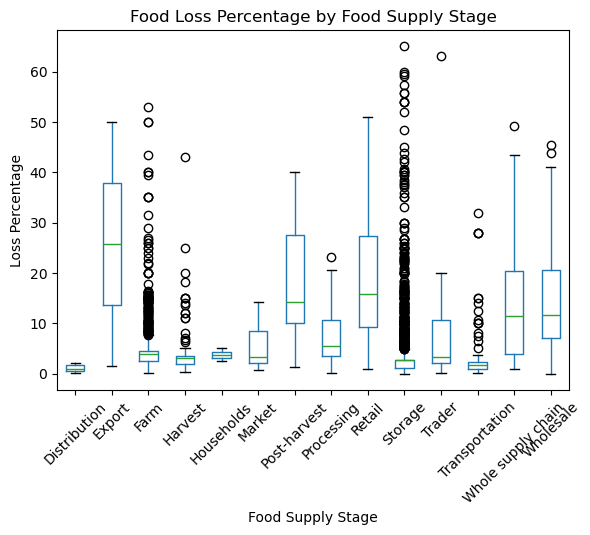

In [127]:
plt.figure(figsize=(50, 40))
boxplot = african_data.boxplot(column='loss_percentage', by='food_supply_stage', showfliers=True, grid=False)
plt.title('Food Loss Percentage by Food Supply Stage')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Customize the fliers
# for flier in boxplot['fliers']:
#     flier.set_markersize(10)
#     flier.set_markerfacecolor('blue')

plt.show()

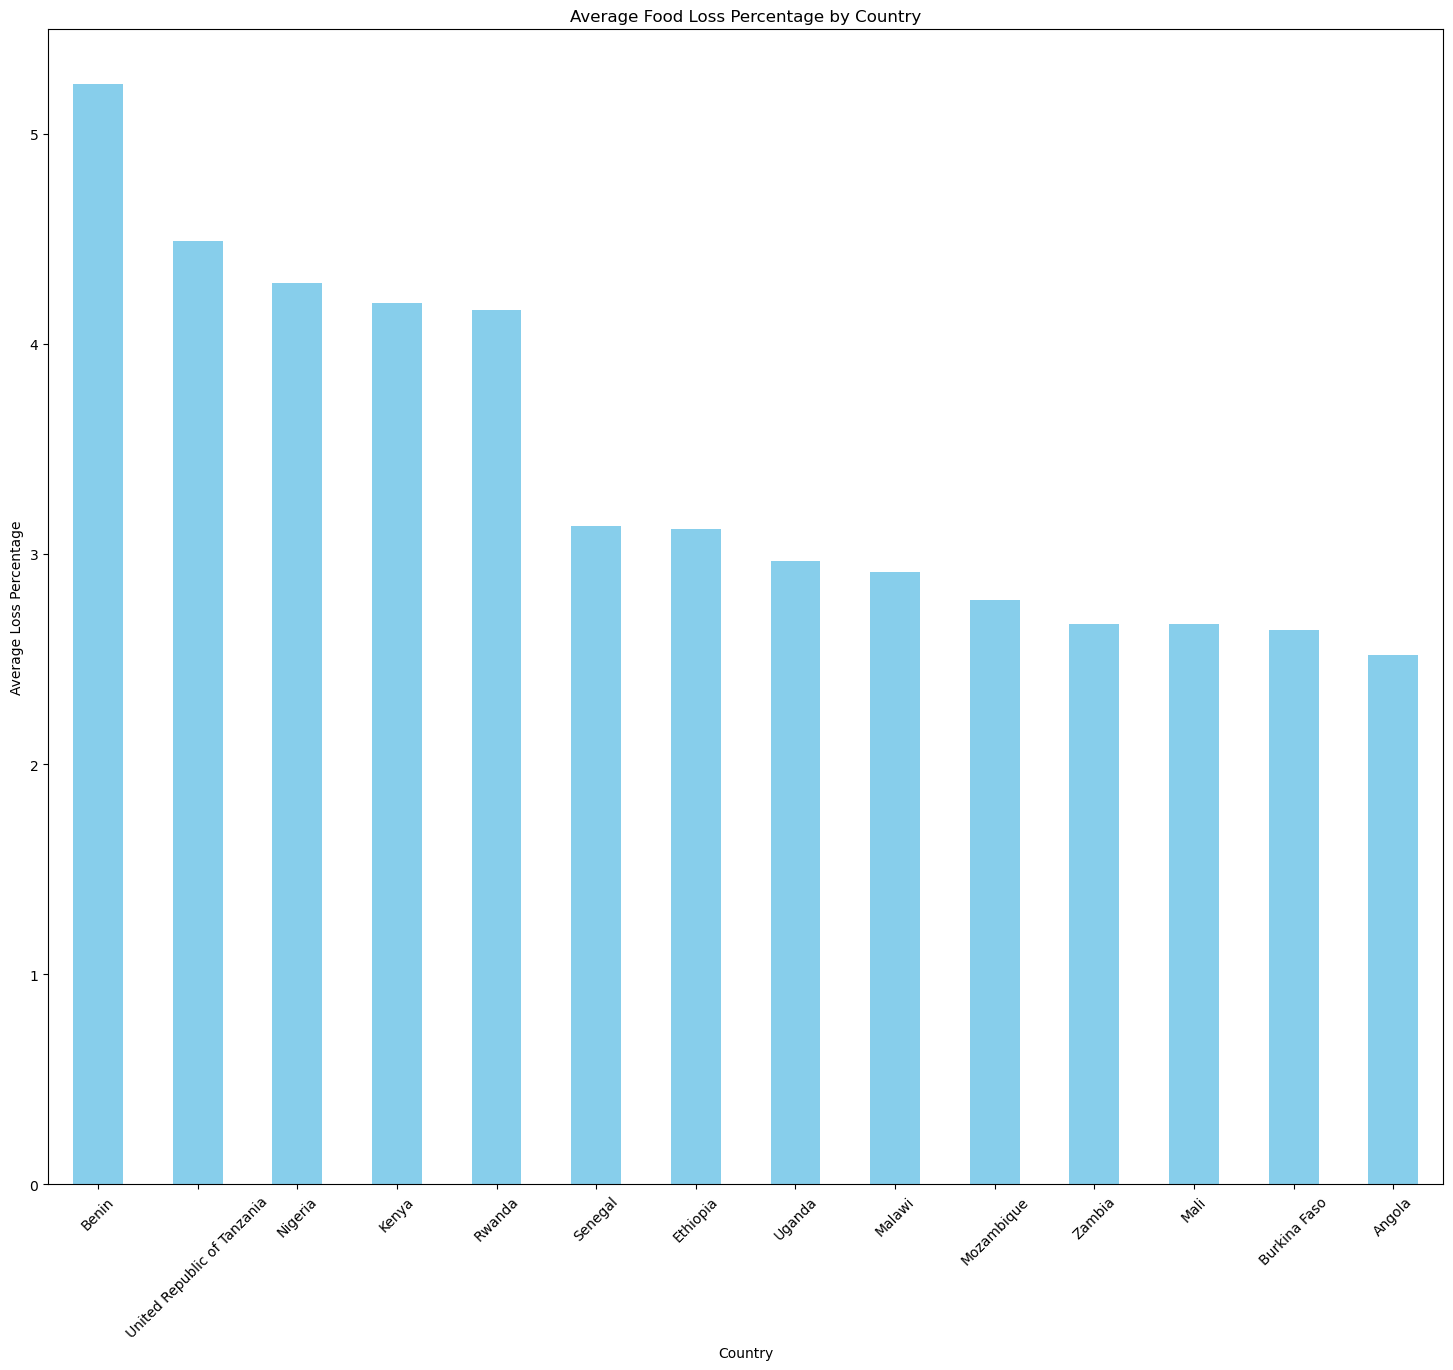

In [128]:
# Create a bar graph
plt.figure(figsize=(18, 15))
waste_by_country_sorted.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Food Loss Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Average Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

<Figure size 1800x1500 with 0 Axes>

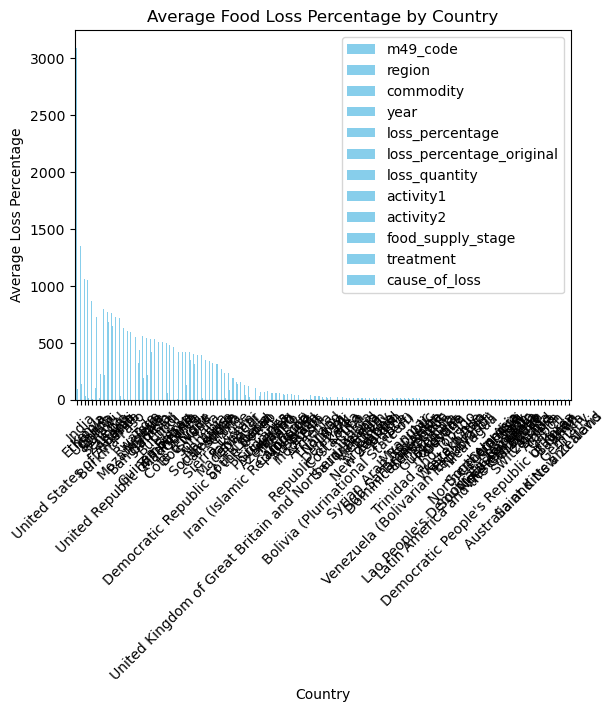

In [129]:
# Create a bar graph
plt.figure(figsize=(18, 15))
count_per_country_sorted.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Food Loss Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Average Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


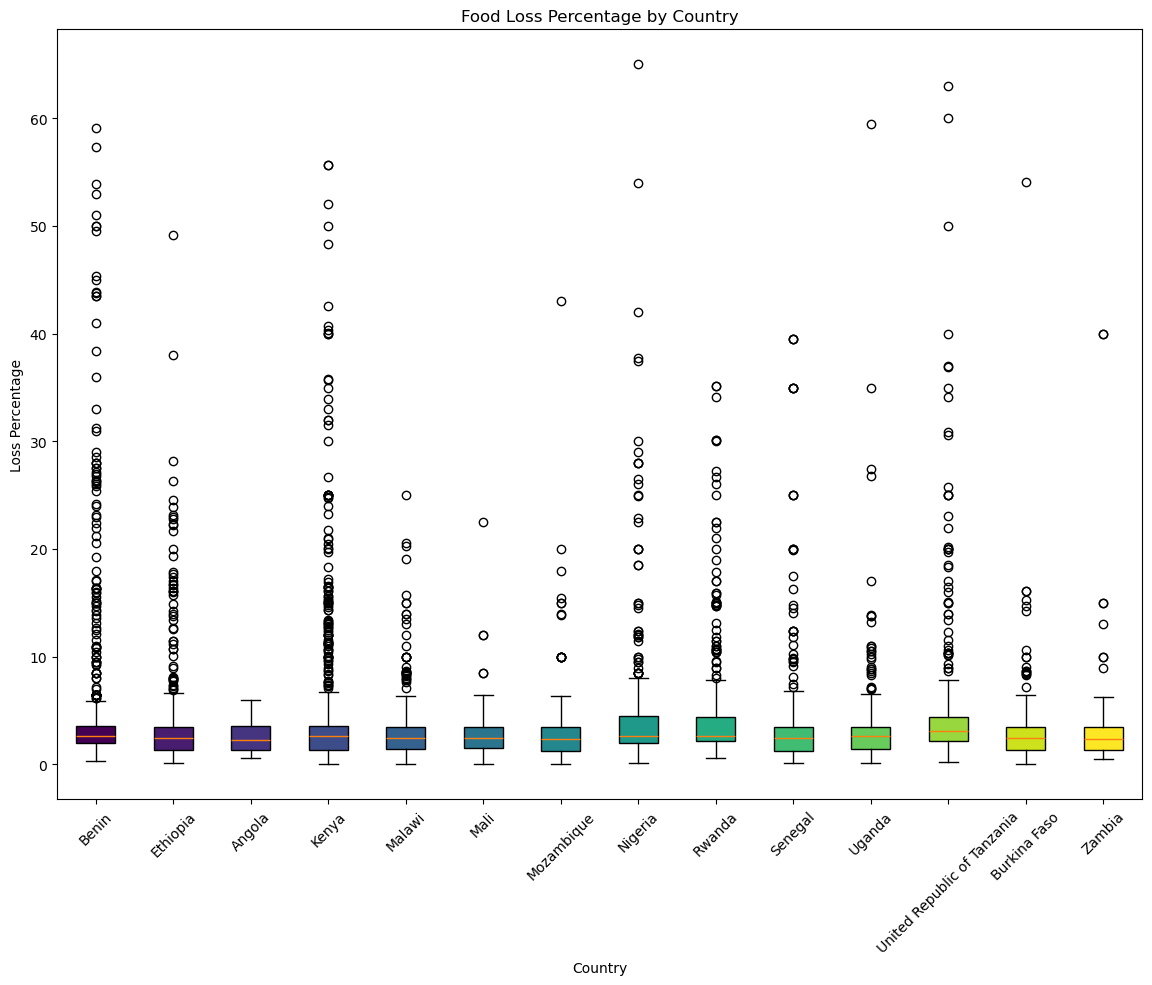

In [130]:
# Create a box plot using matplotlib
plt.figure(figsize=(14, 10))
box_data = [african_data[african_data['country'] == country]['loss_percentage'] for country in african_data['country'].unique()]
boxplot = plt.boxplot(box_data, labels=african_data['country'].unique(), patch_artist=True, showfliers=True)

# Color code each boxplot with a different color
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))  # Generate a list of colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the plot
plt.title('Food Loss Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [131]:
# Map coordinates to the data
waste_by_country["lat"] = waste_by_country["country"].map(lambda x: country_coords[x][0])
waste_by_country["lon"] = waste_by_country["country"].map(lambda x: country_coords[x][1])

In [132]:
# Print the first few rows of the DataFrame
print("First few rows of waste_by_country DataFrame:", waste_by_country.head())

First few rows of waste_by_country DataFrame:         country  loss_percentage        lat        lon
0        Angola         2.519641 -11.202692  17.873887
1         Benin         5.235248   9.307690   2.315834
2  Burkina Faso         2.639668  12.238333  -1.561593
3      Ethiopia         3.117120   9.145000  40.489673
4         Kenya         4.196380  -1.286389  36.817223


In [133]:
# Define a color palette
color_palette = hv.Cycle('Category20').values

# Create a heat map using hvplot with different colors for each country
heatmap = waste_by_country.hvplot.points(
    'lon', 'lat', geo=True, size='size', color='country',
    cmap=color_palette, hover_cols=['country', 'loss_percentage'], tiles='OSM',
    title='Average Food Waste Percentage by Country'
).opts(
    show_legend=False
)

# Show the plot
heatmap

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (country,loss_percentage)

In [134]:
# Calculate summary statistics for food waste by country
summary_stats = african_data.groupby("country")["loss_percentage"].describe()

summary_stats_rounded = summary_stats.round(2)

# Display the summary statistics
summary_stats


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Angola,726.0,2.519641,1.454280,0.569206,1.300000,2.313260,3.600000,5.95971
Benin,718.0,5.235248,8.451072,0.300000,2.000000,2.650000,3.600000,59.10000
Burkina Faso,758.0,2.639668,2.633355,0.000467,1.320000,2.500000,3.500000,54.05000
Ethiopia,1064.0,3.117120,3.635740,0.100000,1.300000,2.500000,3.500000,49.20000
Kenya,1048.0,4.196380,6.481376,0.004021,1.320000,2.650000,3.600000,55.70000
Malawi,803.0,2.915527,2.399289,0.001161,1.390945,2.500000,3.500000,25.00000
Mali,625.0,2.667160,1.783064,0.080625,1.550000,2.500000,3.500000,22.50000
Mozambique,595.0,2.781575,2.716801,0.080000,1.275000,2.347540,3.499935,43.00000
Nigeria,555.0,4.291542,5.987916,0.120000,2.000000,2.596500,4.537505,65.00000


In [135]:
# Calculate average loss percentage by food supply stage
average_loss_by_stage = african_data.groupby("food_supply_stage")["loss_percentage"].mean().reset_index()

# Round the average loss percentages to 2 decimal places
average_loss_by_stage["loss_percentage"] = average_loss_by_stage["loss_percentage"].round(2)

# Define a color palette
color_palette = hv.Cycle('Category20').values

# Create a bar chart using hvplot
bar_chart = average_loss_by_stage.hvplot.bar(
    x='food_supply_stage', y='loss_percentage', 
    title='Average Food Loss Percentage by Production Stage',
    xlabel='Production Stage', ylabel='Average Loss Percentage',
    height=400, width=600,
    color='food_supply_stage', cmap=color_palette
).opts(
    xrotation=45,
    show_legend=False
)

# Show the plot
bar_chart

:Bars   [food_supply_stage]   (loss_percentage)

C:\Users\taire\AppData\Local\Temp\ipykernel_18672\1460036908.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(average_loss_by_stage['food_supply_stage']))


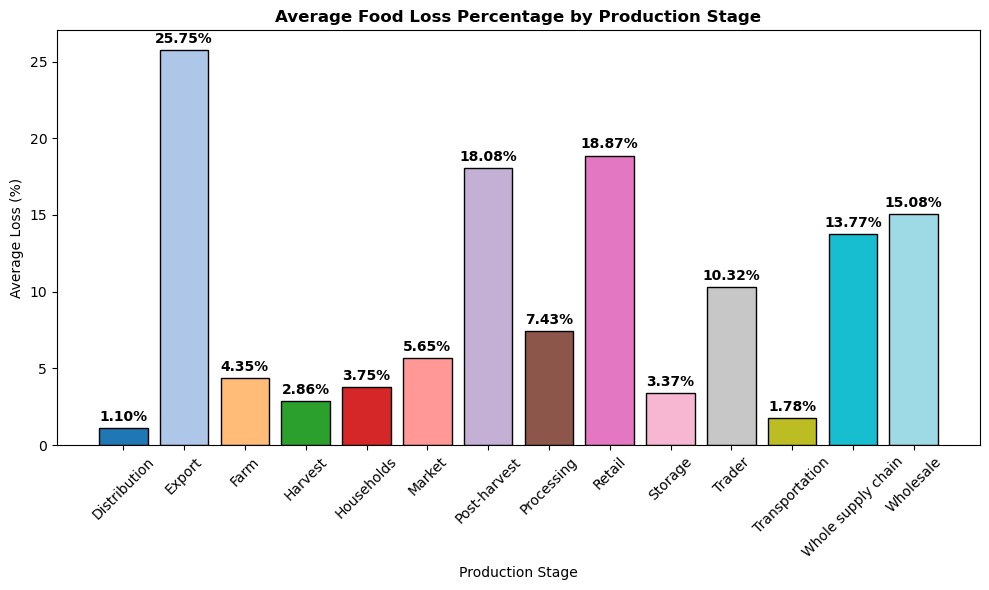

In [143]:
# Calculate average loss percentage by food supply stage
average_loss_by_stage = african_data.groupby("food_supply_stage")["loss_percentage"].mean().reset_index()

# Round the average loss percentages to 2 decimal places
average_loss_by_stage["loss_percentage"] = average_loss_by_stage["loss_percentage"].round(2)

# Define a color palette
color_palette = plt.cm.get_cmap('tab20', len(average_loss_by_stage['food_supply_stage']))

# Create a bar chart using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(average_loss_by_stage['food_supply_stage'], average_loss_by_stage['loss_percentage'], 
              color=[color_palette(i) for i in range(len(average_loss_by_stage['food_supply_stage']))],
              edgecolor='black')  # Add black borders

# Set labels and title
ax.set_ylabel("Average Loss (%)")
ax.set_xlabel("Production Stage")
ax.set_title("Average Food Loss Percentage by Production Stage", fontweight='bold')
plt.xticks(rotation=45)

# Annotate each bar with the percentage
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='black')
# Show the plot
plt.tight_layout()
plt.show()


In [137]:
#Running statistical analysis on food loss percentage by production stage

# Prepare the data for ANOVA
# Extract the relevant columns
anova_data = african_data[['food_supply_stage', 'loss_percentage']]

# Perform ANOVA
anova_result = stats.f_oneway(
    *[anova_data.loc[anova_data['food_supply_stage'] == stage, 'loss_percentage'] for stage in anova_data['food_supply_stage'].unique()]
)

print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

# If the ANOVA p-value is significant (e.g., < 0.05), perform Tukey's HSD test
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(anova_data['loss_percentage'], anova_data['food_supply_stage'], alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences found among the production stages.")

# Save the Tukey's HSD result to a CSV file if significant
if anova_result.pvalue < 0.05:
    tukey_summary = pd.DataFrame(data=tukey_result.summary())
    tukey_summary.to_csv("tukey_hsd_results.csv", index=False)

ANOVA result: F-statistic = 198.59067314539595, p-value = 0.0
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
      Distribution             Export   24.654    0.0  13.2041  36.1039   True
      Distribution               Farm   3.2579 0.8837  -2.8679   9.3837  False
      Distribution            Harvest    1.768 0.9995  -4.3618   7.8979  False
      Distribution         Households    2.654    1.0  -8.7959  14.1039  False
      Distribution             Market   4.5583 0.8225   -3.455  12.5716  False
      Distribution       Post-harvest  16.9884    0.0  10.0702  23.9067   True
      Distribution         Processing   6.3318 0.0522  -0.0267  12.6902  False
      Distribution             Retail  17.7762    0.0  11.3838  24.1686   True
      Distribution            Storage   2.2772 0.9938  -3.8478   8.40

In [140]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
# Prepare the data
anova_data = african_data[['food_supply_stage', 'loss_percentage']]

# Define the stage to compare (e.g., 'Export')
target_stage = 'Export'

# Get the data for the target stage
target_data = anova_data[anova_data['food_supply_stage'] == target_stage]['loss_percentage']

# Get the list of all other stages
other_stages = anova_data['food_supply_stage'].unique()
other_stages = other_stages[other_stages != target_stage]

# Perform t-tests
p_values = []
comparisons = []

for stage in other_stages:
    stage_data = anova_data[anova_data['food_supply_stage'] == stage]['loss_percentage']
    t_stat, p_value = ttest_ind(target_data, stage_data)
    p_values.append(p_value)
    comparisons.append(f'{target_stage} vs {stage}')

# Apply Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# Prepare the results
results = pd.DataFrame({
    'Comparison': comparisons,
    'p-value': p_values,
    'p-value (corrected)': pvals_corrected,
    'Reject Null Hypothesis': reject
})

print(results)

# Save the results to a CSV file
results.to_csv("t_test_results.csv", index=False)

                      Comparison        p-value  p-value (corrected)  \
0                 Export vs Farm   2.900766e-17         3.770996e-16   
1              Export vs Storage   1.966723e-08         2.556739e-07   
2              Export vs Harvest   3.854672e-56         5.011073e-55   
3       Export vs Transportation  4.603124e-102        5.984061e-101   
4         Export vs Post-harvest   4.653322e-01         1.000000e+00   
5           Export vs Processing   9.773510e-04         1.270556e-02   
6            Export vs Wholesale   2.565386e-01         1.000000e+00   
7               Export vs Retail   4.868890e-01         1.000000e+00   
8   Export vs Whole supply chain   1.772607e-01         1.000000e+00   
9               Export vs Market   1.111691e-01         1.000000e+00   
10              Export vs Trader   3.020823e-01         1.000000e+00   
11        Export vs Distribution   1.130637e-01         1.000000e+00   
12          Export vs Households   4.605590e-01         1.000000

In [141]:
# Prepare the data
anova_data = african_data[['food_supply_stage', 'loss_percentage']]

# Define the stage to compare (e.g., 'Export')
target_stage = 'Retail'

# Get the data for the target stage
target_data = anova_data[anova_data['food_supply_stage'] == target_stage]['loss_percentage']

# Get the list of all other stages
other_stages = anova_data['food_supply_stage'].unique()
other_stages = other_stages[other_stages != target_stage]

# Perform t-tests
p_values = []
comparisons = []

for stage in other_stages:
    stage_data = anova_data[anova_data['food_supply_stage'] == stage]['loss_percentage']
    t_stat, p_value = ttest_ind(target_data, stage_data)
    p_values.append(p_value)
    comparisons.append(f'{target_stage} vs {stage}')

# Apply Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# Prepare the results
results = pd.DataFrame({
    'Comparison': comparisons,
    'p-value': p_values,
    'p-value (corrected)': pvals_corrected,
    'Reject Null Hypothesis': reject
})

print(results)

                      Comparison        p-value  p-value (corrected)  \
0                 Retail vs Farm  9.503531e-146        1.235459e-144   
1              Retail vs Storage   1.601666e-81         2.082166e-80   
2              Retail vs Harvest  3.327134e-244        4.325274e-243   
3       Retail vs Transportation   0.000000e+00         0.000000e+00   
4         Retail vs Post-harvest   8.189244e-01         1.000000e+00   
5               Retail vs Export   4.868890e-01         1.000000e+00   
6           Retail vs Processing   6.163254e-09         8.012230e-08   
7            Retail vs Wholesale   1.168345e-01         1.000000e+00   
8   Retail vs Whole supply chain   3.339691e-02         4.341598e-01   
9               Retail vs Market   1.008098e-02         1.310527e-01   
10              Retail vs Trader   4.829369e-02         6.278180e-01   
11        Retail vs Distribution   3.520117e-03         4.576152e-02   
12          Retail vs Households   1.076566e-01         1.000000

In [142]:
# Prepare the data
anova_data = african_data[['food_supply_stage', 'loss_percentage']]

# Define the stage to compare (e.g., 'Export')
target_stage = 'Post-harvest'

# Get the data for the target stage
target_data = anova_data[anova_data['food_supply_stage'] == target_stage]['loss_percentage']

# Get the list of all other stages
other_stages = anova_data['food_supply_stage'].unique()
other_stages = other_stages[other_stages != target_stage]

# Perform t-tests
p_values = []
comparisons = []

for stage in other_stages:
    stage_data = anova_data[anova_data['food_supply_stage'] == stage]['loss_percentage']
    t_stat, p_value = ttest_ind(target_data, stage_data)
    p_values.append(p_value)
    comparisons.append(f'{target_stage} vs {stage}')

# Apply Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# Prepare the results
results = pd.DataFrame({
    'Comparison': comparisons,
    'p-value': p_values,
    'p-value (corrected)': pvals_corrected,
    'Reject Null Hypothesis': reject
})

print(results)

                            Comparison        p-value  p-value (corrected)  \
0                 Post-harvest vs Farm   5.394143e-56         7.012386e-55   
1              Post-harvest vs Storage   7.501442e-28         9.751875e-27   
2              Post-harvest vs Harvest  1.389082e-159        1.805807e-158   
3       Post-harvest vs Transportation  1.258191e-301        1.635648e-300   
4               Post-harvest vs Export   4.653322e-01         1.000000e+00   
5           Post-harvest vs Processing   1.082695e-06         1.407503e-05   
6            Post-harvest vs Wholesale   3.605674e-01         1.000000e+00   
7               Post-harvest vs Retail   8.189244e-01         1.000000e+00   
8   Post-harvest vs Whole supply chain   1.692061e-01         1.000000e+00   
9               Post-harvest vs Market   1.178353e-02         1.531859e-01   
10              Post-harvest vs Trader   1.393916e-01         1.000000e+00   
11        Post-harvest vs Distribution   3.849788e-03         5.

In [147]:
# Calculate the average food loss percentage by country
average_loss_by_country = african_data.groupby("country")["loss_percentage"].mean().reset_index()

# Sort the countries by highest average food loss percentage
sorted_loss_by_country = average_loss_by_country.sort_values(by="loss_percentage", ascending=False)

# Display the top countries with the highest food loss percentage
top_countries_with_highest_loss = sorted_loss_by_country.head(10)

# Print the results
print(top_countries_with_highest_loss)

                        country  loss_percentage
1                         Benin         5.235248
12  United Republic of Tanzania         4.489770
8                       Nigeria         4.291542
4                         Kenya         4.196380
9                        Rwanda         4.161885
10                      Senegal         3.133462
3                      Ethiopia         3.117120
11                       Uganda         2.965566
5                        Malawi         2.915527
7                    Mozambique         2.781575
